### Air Quality Analytics: Predicting Carbon Monoxide Levels through Multivariate Regression

In [2]:
"""
This notebook is the Final Project Code for Stats 5010
Team Members:
Olan Pinto
Harish Nandhan Shanmugam
Dnyaneshwari Rakshe
"""

In [73]:
import pandas as pd
import itertools
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_squared_error

In [74]:
# !dir

In [75]:
df=pd.read_excel('AirQualityUCI.xlsx')

In [76]:
df.describe()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2004-09-21 04:30:05.193972480,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
min,2004-03-10 00:00:00,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,2004-06-16 00:00:00,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,2004-09-21 00:00:00,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2004-12-28 00:00:00,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,2005-04-04 00:00:00,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036
std,NaN,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670


In [77]:
df.drop(['Date','Time'],inplace=True,axis=1)
df.dropna(inplace=True)

In [78]:
df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 950.4 KB


In [80]:
target = 'CO(GT)'
predictors = [col for col in df.columns if col != target]
X = df[predictors]
y = df[target]

In [81]:
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
alpha_crit = 0.05

remaining_predictors = predictors.copy()
eliminated = []

while True:
    p_values = model.pvalues.drop('const')
    max_p_val = p_values.max()

    if max_p_val < alpha_crit:
        break

    worst_feature = p_values.idxmax()
    remaining_predictors.remove(worst_feature)
    eliminated.append((worst_feature, max_p_val))

    X_new = sm.add_constant(df[remaining_predictors])
    model = sm.OLS(y, X_new).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CO(GT)   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     1051.
Date:                Thu, 01 May 2025   Prob (F-statistic):               0.00
Time:                        20:46:57   Log-Likelihood:                -51000.
No. Observations:                9357   AIC:                         1.020e+05
Df Residuals:                    9348   BIC:                         1.021e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -68.1834      6.664    -10.231      0.000     -81.247     -55.120
NMHC(GT)         0.0454      0.005     10.011      0.000       0.037       0.054
C6H6(GT)        -0.7452      0.130     -5.710      0.000      -1.001      -0.489
NOx(GT)          0.0358      0.006      6.469      0.000       0.025       0.047
PT08.S3(NOx)     0.0168      0.004      4.373      0.000       0.009       0.024
NO2(GT)          0.3878      0.009     42.524      0.000       0.370       0.406
PT08.S5(O3)     -0.0141      0.004     -3.832      0.000      -0.021      -0.007
T                0.4243      0.091      4.660      0.000       0.246       0.603
RH               0.2586      0.035      7.443      0.000       0.191       0.327
==============================================================================
Omnibus:                     2004.923   Durbin-Watson:                   0.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8220.646
Skew:                          -1.007   Prob(JB):                         0.00
Kurtosis:                       7.126   Cond. No.                     1.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The OLS regression model results explain approximately 47.3% of the variance in CO(GT) levels. R-squared = 0.473 and is statistically significant.
Overall F-statistic p-value < 0.001
All predictors are significant at the 0.05 level, indicating meaningful associations with CO(GT). However, the high condition number (1.53e+04) suggests potential multicollinearity, which may affect the stability of coefficient estimates. Despite this, the model provides a moderately strong fit and valuable insights into the factors influencing CO(GT) concentrations.

In [82]:
def forward_selection_sse(df, target_col, max_k):
    features = [col for col in df.columns if col != target_col]
    selected_features = []
    remaining_features = features.copy()
    y = df[target_col]

    while len(selected_features) < max_k and remaining_features:
        best_feature = None
        min_sse = np.inf

        for feature in remaining_features:
            trial_features = selected_features + [feature]
            X = sm.add_constant(df[trial_features])
            model = sm.OLS(y, X).fit()
            predictions = model.predict(X)
            sse = np.sum((y - predictions) ** 2)

            if sse < min_sse:
                min_sse = sse
                best_feature = feature

        if best_feature:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break

    return selected_features

top_k_features = forward_selection_sse(df, target_col='CO(GT)', max_k=8)
top_k_features


['NO2(GT)',
 'PT08.S5(O3)',
 'RH',
 'NMHC(GT)',
 'NOx(GT)',
 'PT08.S2(NMHC)',
 'T',
 'AH']

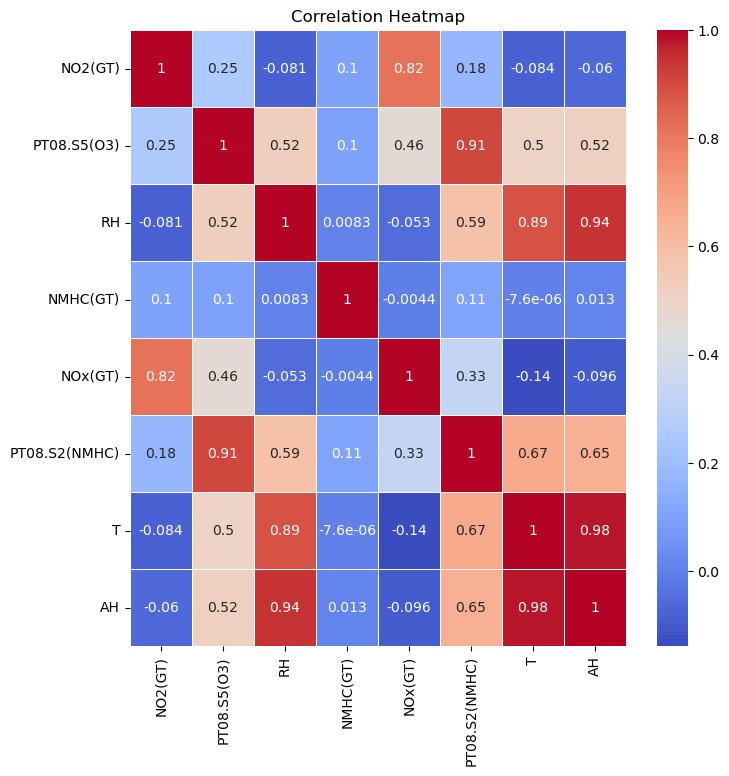

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df[top_k_features].corr()

plt.figure(figsize=(8, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

T (Temperature) and AH (Absolute Humidity) are highly correlated (0.98)

RH (Relative Humidity) also shows strong positive correlation with AH (0.94) and T (0.89)

PT08.S2(NMHC) is highly correlated with PT08.S5(O3) (0.91) and RH (0.59)

NO2(GT) and NOx(GT) are also strongly correlated (0.82)

These strong correlations help us understand the large condition number (1.53e+04) in the OLS regression output.
This suggests us that multicollinearity can lead to unreliable coefficient estimates.

**Multiple Linear Regression**

1. Using all features

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [85]:
X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X1_train = sm.add_constant(X_train_all)
X1_test = sm.add_constant(X_test_all)

model1 = sm.OLS(y_train, X1_train).fit()
y_pred1 = model1.predict(X1_test)

print("Model 1 - Using all features:")
print(f"  R2: {model1.rsquared:.4f}")
print(f"  Adj R2: {model1.rsquared_adj:.4f}")
print(f"  MSE: {mean_squared_error(y_test, y_pred1):.4f}")
print(f"  AIC: {model1.aic:.4f}")


Model 1 - Using all features:
  R2: 0.4631
  Adj R2: 0.4623
  MSE: 2863.3927
  AIC: 81802.3038


2. Using top-k features

In [86]:
X2_train = sm.add_constant(X_train_all[top_k_features])
X2_test = sm.add_constant(X_test_all[top_k_features])

model2 = sm.OLS(y_train, X2_train).fit()
y_pred2 = model2.predict(X2_test)

print("Model 2 - Using top-8 features:")
print(f"  R2: {model2.rsquared:.4f}")
print(f"  Adj R2: {model2.rsquared_adj:.4f}")
print(f"  MSE: {mean_squared_error(y_test, y_pred2):.4f}")
print(f"  AIC: {model2.aic:.4f}")

Model 2 - Using top-8 features:
  R2: 0.4625
  Adj R2: 0.4619
  MSE: 2856.3009
  AIC: 81803.6975


3. Using top-5 features

In [87]:
top_5_features = top_k_features[:5]
top_5_features

['NO2(GT)', 'PT08.S5(O3)', 'RH', 'NMHC(GT)', 'NOx(GT)']

In [88]:
X3_train = sm.add_constant(X_train_all[top_5_features])
X3_test = sm.add_constant(X_test_all[top_5_features])

model3 = sm.OLS(y_train, X3_train).fit()
y_pred3 = model3.predict(X3_test)

print("Model 3 - Using top-5 features:")
print(f"  R2: {model3.rsquared:.4f}")
print(f"  Adj R2: {model3.rsquared_adj:.4f}")
print(f"  MSE: {mean_squared_error(y_test, y_pred3):.4f}")
print(f"  AIC: {model3.aic:.4f}")

Model 3 - Using top-5 features:
  R2: 0.4602
  Adj R2: 0.4598
  MSE: 2863.1000
  AIC: 81829.7584


Based on above performance metrics, selecting Model 2 as the final model for further statistical analysis.

Q-Q plot

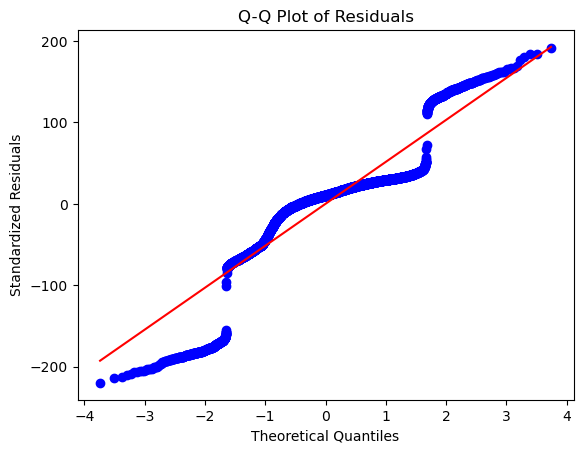

In [89]:
import matplotlib.pyplot as plt
import scipy.stats as stats

stats.probplot(model2.resid, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

 While the center of the distribution aligns moderately well with what we’d expect under normality, the residuals are too extreme, too often.

The plot reveals a distinct S-curve, hinting that our model may struggle with extremes. These bends suggest skewness and kurtosis, a sign that the model is not fully capturing the underlying patterns in the data.

Durbin-Watson

In [90]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(model2.resid)
print(f"Durbin-Watson statistic: {dw_stat:.4f}")


Durbin-Watson statistic: 2.0420


As Durbin Watson test statistic results are close to 2 this indicates that there is no significant autocorrelation in the residuals of the regression model. This is a good sign as it indicates that the residuals are approximately independent.

**F test**

**Full model:** With all predictors.

**Reduced model:** With a subset of predictors i.e. top_k_features.

In [91]:
from scipy.stats import f as f_dist

In [92]:
X_full = sm.add_constant(X)
X_reduced = sm.add_constant(X[top_k_features])

In [93]:
def f_test(X_full, X_reduced, y):
    X_full = sm.add_constant(X_full)
    X_reduced = sm.add_constant(X_reduced)

    full_model = sm.OLS(y, X_full).fit()
    reduced_model = sm.OLS(y, X_reduced).fit()

    RSS_full = np.sum((y - full_model.fittedvalues) ** 2)
    RSS_reduced = np.sum((y - reduced_model.fittedvalues) ** 2)

    df_full = full_model.df_resid
    df_reduced = reduced_model.df_resid
    df_diff = df_reduced - df_full

    F_stat = ((RSS_reduced - RSS_full) / df_diff) / (RSS_full / df_full)


    p_value = 1 - f_dist.cdf(F_stat, df_diff, df_full)

    print(f"F-statistic: {F_stat:.4f}")
    print(f"p-value: {p_value:.4f}")

    if p_value < 0.05:
        print("Reject the null hypothesis: Full model significantly improves fit.")
    else:
        print("Fail to reject the null hypothesis: Reduced model is sufficient.")



In [94]:
f_test(X_full, X_reduced, y)

F-statistic: 1.6775
p-value: 0.1521
Fail to reject the null hypothesis: Reduced model is sufficient.


GLM

In [95]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

df_glm = df[df['CO(GT)'] > 0].copy()

selected = ['NO2(GT)', 'PT08.S5(O3)', 'RH', 'NMHC(GT)', 'NOx(GT)', 'PT08.S2(NMHC)', 'T', 'AH']

X_glm = sm.add_constant(df_glm[selected])
y_glm = df_glm['CO(GT)']

glm_model = sm.GLM(y_glm, X_glm, family=sm.families.Gamma(link=sm.families.links.log()))
glm_results = glm_model.fit()

print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 CO(GT)   No. Observations:                 7674
Model:                            GLM   Df Residuals:                     7665
Model Family:                   Gamma   Df Model:                            8
Link Function:                    log   Scale:                        0.079267
Method:                          IRLS   Log-Likelihood:                -6117.0
Date:                Thu, 01 May 2025   Deviance:                       739.80
Time:                        20:46:59   Pearson chi2:                     608.
No. Iterations:                    21   Pseudo R-squ. (CS):             0.9912
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.3291      0.023    -57.031

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


The Generalized Linear Model (GLM) with a Gamma family and log link function provides a very strong fit to the data, indicated by a pseudo R-squared (Cragg-Uhler) of 0.9912, suggesting the model explains over 99% of the deviance. Most predictors are statistically significant (p < 0.05), except for PT08.S5(O3), which is not significant (p = 0.342). The coefficients represent the multiplicative effect on the expected value of CO(GT) due to the log link. Overall, the model captures the nonlinear and skewed nature of the CO(GT) variable effectively.

Residuals vs Fitted Plot - for testing constant variance
Q - Q plot for testing Normality

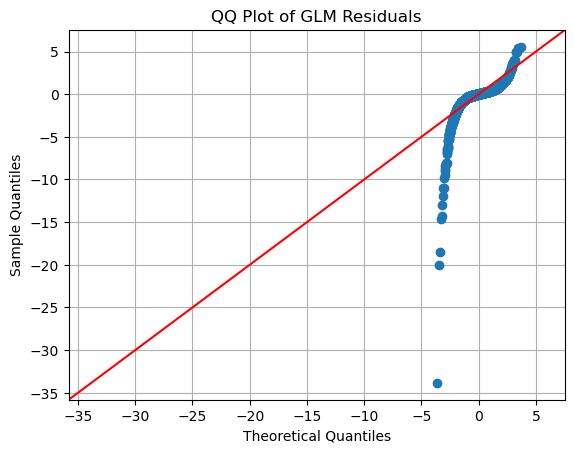

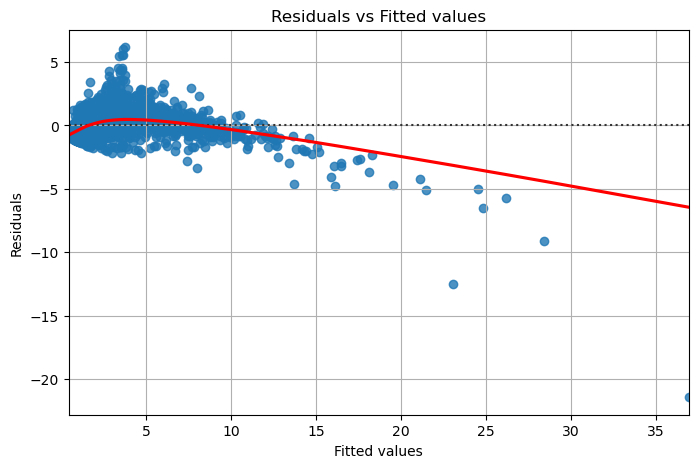

In [96]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns


residuals = glm_results.resid_response
fitted = glm_results.fittedvalues


fig_qq = sm.qqplot(residuals, line='45')
plt.title('QQ Plot of GLM Residuals')
plt.grid(True)

plt.figure(figsize=(8, 5))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.grid(True)

The Q-Q plot doesn’t just show us residuals — it tells us that our model has blind spots. It captures the middle ground well but stumbles at the extremes. Like a weather forecast that gets average temperatures right but misses storms, we need to dig deeper to build a model that’s not just accurate, but resilient and reliable

The residuals reveal a quiet bias. While the model plays it safe around the average, it hesitates — and underpredicts — when CO levels climb. Like a thermometer that works in room temperature but freezes under pressure, this model may need rethinking. A stronger fit for the high-risk tail could mean the difference between a useful prediction and a missed warning.

Shapiro  Wilk Test - Normality test

In [97]:
shapiro_stat, shapiro_p = stats.shapiro(residuals)
{
"Shapiro-Wilk (W, p)": (shapiro_stat, shapiro_p)
}

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7674.
  res = hypotest_fun_out(*samples, **kwds)


{'Shapiro-Wilk (W, p)': (0.5326943690601436, 3.350773636074833e-89)}

The Shapiro-Wilk test results confirm a significant deviation from normality in residuals.

Levene Test : Test for Constant Variance

In [98]:
median_split = np.median(fitted)
group1 = residuals[fitted <= median_split]
group2 = residuals[fitted > median_split]
levene_stat, levene_p = stats.levene(group1, group2)

{
"Levene Test (W, p)": (levene_stat, levene_p)
}

{'Levene Test (W, p)': (427.4570760077352, 1.861002448899274e-92)}

The Levene's test results indicate a significant violation of the homoskedasticity (equal variance) assumption.

Durbin Watson Test for Auto correlation

In [99]:
dw_stat = sm.stats.durbin_watson(residuals)
{
    "Durbin-Watson Statistic": dw_stat
}

{'Durbin-Watson Statistic': 0.6582402750185921}

Durbin-Watson statistic of 0.658 highlights strong positive autocorrelation in the residuals.


AIC, BIC, MSPE

In [100]:

glm_aic = glm_results.aic
glm_bic = glm_results.bic
glm_mspe = mean_squared_error(y_glm, fitted)

{
    "GLM AIC": glm_aic,
    "GLM BIC": glm_bic,
    "GLM MSPE": glm_mspe
}

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


{'GLM AIC': 12252.028675130165,
 'GLM BIC': -67828.17066483463,
 'GLM MSPE': 1.032604197413935}

The Gamma GLM gives a relatively low AIC (12252.03) and MSPE (1.03), and indicates good model fit and predictive accuracy; however, the negative BIC (-67828.17) is likely due to a calculation or scaling issue and should be interpreted cautiously or verified for consistency.

Random Forest Regression

In [101]:
from sklearn.ensemble import RandomForestRegressor
full_features = [col for col in df.columns if col != 'CO(GT)']
reduced_features = ['NO2(GT)', 'PT08.S5(O3)', 'RH', 'NMHC(GT)', 'NOx(GT)', 'PT08.S2(NMHC)', 'T', 'AH']
y = df['CO(GT)']
X_full = df[full_features]
X_reduced = df[reduced_features]


In [102]:

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_full, y, test_size=0.2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


rf_full = RandomForestRegressor(n_estimators=100, bootstrap=True, random_state=42)
rf_full.fit(X_train_f, y_train_f)
y_pred_f = rf_full.predict(X_test_f)
residuals_f = y_test_f - y_pred_f

rf_reduced = RandomForestRegressor(n_estimators=100, bootstrap=True, random_state=42)
rf_reduced.fit(X_train_r, y_train_r)
y_pred_r = rf_reduced.predict(X_test_r)
residuals_r = y_test_r - y_pred_r

Diagnostic Tests for full model

In [103]:
from scipy.stats import shapiro, levene
shapiro_f = shapiro(residuals_f)
median_fitted_f = np.median(y_pred_f)
group1_f = residuals_f[y_pred_f <= median_fitted_f]
group2_f = residuals_f[y_pred_f > median_fitted_f]
levene_f = levene(group1_f, group2_f)
dw_f = sm.stats.durbin_watson(residuals_f)
mspe_f = mean_squared_error(y_test_f, y_pred_f)

{
    'Full Model': {
        'Shapiro-Wilk (W, p)': shapiro_f,
        'Levene Test (W, p)': levene_f,
        'Durbin-Watson Statistic': dw_f,
        'MSPE': mspe_f
    }
}

{'Full Model': {'Shapiro-Wilk (W, p)': ShapiroResult(statistic=0.7111064493360082, pvalue=5.965647302923372e-49),
  'Levene Test (W, p)': LeveneResult(statistic=463.4345505301053, pvalue=5.152610175392954e-92),
  'Durbin-Watson Statistic': 2.016487134614597,
  'MSPE': 2071.668826698207}}

 Shapiro-Wilk Test for Normality:

- W = 0.7111, p < 0.00001

- This result rejects the null hypothesis of normality. Residuals are not normally distributed, which could imply heterogeneity or outliers

Levene’s Test for Homoscedasticity:

- Stat = 463.43, p < 0.00001

- Strongly rejects the null hypothesis of equal variances — indicating heteroscedasticity. The residual spread differs across different prediction magnitudes.



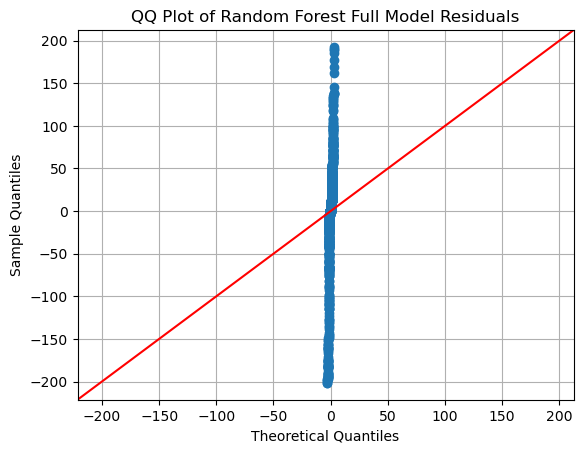

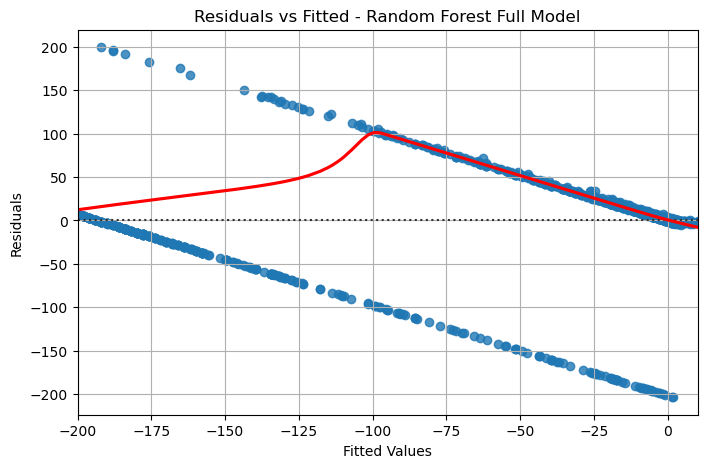

In [104]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sm.qqplot(residuals_f, line='45')
plt.title('QQ Plot of Random Forest Full Model Residuals')
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred_f, y=residuals_f, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted - Random Forest Full Model')
plt.grid(True)
plt.show()


Although the full-feature Random Forest model provides a decent MSPE and no residual autocorrelation (DW ≈ 2), visual and statistical tests reveal significant non-normality and heteroscedasticity in the residuals.

The QQ plot confirms the residuals are far from normally distributed, while the residuals vs fitted plot highlights non-constant variance and systematic prediction errors, particularly for extreme CO(GT) values.

These findings are not unusual for Random Forests, which do not assume linearity or normality. However, the layered residuals and heteroscedastic spread suggest the model might be oversimplifying or failing to generalize well in some regions of the input space.

Diagnostic Tests for Reduced model

In [105]:
shapiro_r = shapiro(residuals_r)
median_fitted_r = np.median(y_pred_r)
group1_r = residuals_r[y_pred_r <= median_fitted_r]
group2_r = residuals_r[y_pred_r > median_fitted_r]
levene_r = levene(group1_r, group2_r)
dw_r = sm.stats.durbin_watson(residuals_r)
mspe_r = mean_squared_error(y_test_r, y_pred_r)
{
    'Reduced Model': {
        'Shapiro-Wilk (W, p)': shapiro_r,
        'Levene Test (W, p)': levene_r,
        'Durbin-Watson Statistic': dw_r,
        'MSPE': mspe_r
    }
}

{'Reduced Model': {'Shapiro-Wilk (W, p)': ShapiroResult(statistic=0.7293088790777911, pvalue=6.697713271341072e-48),
  'Levene Test (W, p)': LeveneResult(statistic=481.816119585437, pvalue=3.304337305958416e-95),
  'Durbin-Watson Statistic': 2.0325623839406175,
  'MSPE': 2278.2588299365425}}

Mean Squared Prediction Error (MSPE): 2278.26

- This is higher than the full model’s MSPE (2071.67), indicating a modest decrease in predictive accuracy.

Durbin-Watson Statistic: 2.033

- Similar to the full model (DW ≈ 2.02), indicating no major autocorrelation in residuals — a good sign.

Shapiro-Wilk Normality Test:

- W = 0.7293, p < 1e-47

- Residuals are clearly non-normal, similar to the full model. Again, not unexpected in Random Forests.

Levene’s Test for Equal Variance:

- Stat = 481.82, p < 1e-94

- Indicates strong heteroscedasticity, even more pronounced than the full model (Levene stat was 463.43). Residual spread varies significantly with fitted values.


The reduced Random Forest model, while simpler, maintains key strengths from the full model — namely, no residual autocorrelation and comparable residual distribution patterns. However, it experiences a slight performance drop, reflected in a higher MSPE.

Just like the full model, the residuals are non-normal and show heteroscedastic behavior, as confirmed by statistical tests. In fact, the variability in residual spread (Levene stat = 481.82) is even stronger, possibly due to reduced feature diversity failing to capture complex variations in CO levels.

Despite this, the reduced model offers value in situations prioritizing feature interpretability or computational efficiency, trading off only a modest loss in predictive power.

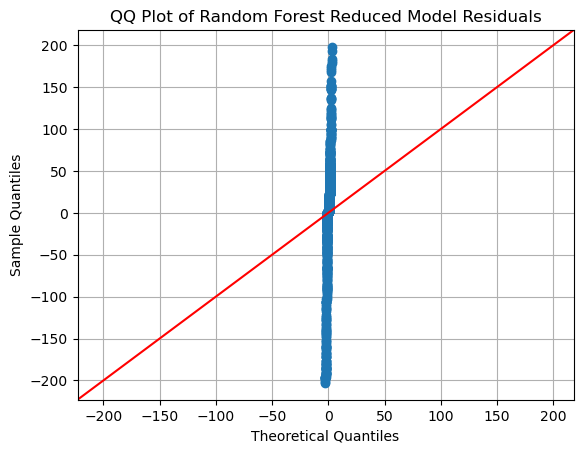

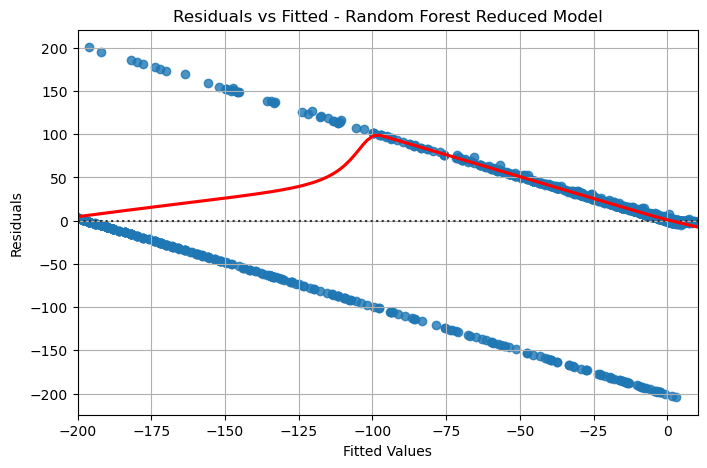

In [106]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sm.qqplot(residuals_r, line='45')
plt.title('QQ Plot of Random Forest Reduced Model Residuals')
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred_r, y=residuals_r, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted - Random Forest Reduced Model')
plt.grid(True)
plt.show()

The full model edges out the reduced one with lower MSPE (2071 vs 2278), showing better predictive accuracy. However, the reduced model's performance is relatively close despite using fewer predictors, which could be favorable in contexts where model simplicity or feature availability matters.

Ultimately, both models demonstrate the classic behavior of Random Forests — high flexibility but non-Gaussian, heteroscedastic residuals. Further tuning or alternate models like XGBoost, quantile forests, or residual modeling with linear adjustments could help improve calibration and interpretability.



## Report: 


### Introduction

Our project centered on developing predictive models for carbon monoxide (CO(GT)) concentration in the air using the UCI Air Quality dataset. The dataset comprises of hourly sensor recordings, including gas sensors and meteorological readings, from an Italian city. The goal was to evaluate the performance of a regression model (more specifically Random Forest Regressor) with full feature sets against a reduced subset of top-ranked features, comparing model fit and residuals visually and through statistical methods. We started the project with importing the libaries necessary for the statistical analysis and then went ahead with preparation of the dataset, which comprised 9357 rows and 13 columns of numerical data. The target feature was CO(GT) which pertains to the hourly concentration of Carbon Monoxide in the ambient air.


### Data Analysis

We then tried to build a model that explains and predicts Carbon monoxide levels using various statistics concepts that we learnt this semester. First, we went ahead and implemented a Multiple Linear Regression (MLR) model with all available predictors. We used an ordinary least squares (OLS) model and obtained an R² value of about 0.473 which indicated that almost half (47.3%) of the CO levels variance was explained by the features. There was, however, an indication of multicollinearity because of the high condition number (shown in the summary output), meaning feature selection strategies had to be applied. THis is why we implemented both backward elimination (based on regression summary p-values) and forward selection (based on the minimized Sum of Squared Errors).

To confirm that results were obeying regression assumptions, we looked at a bunch of diagnostics tests and plots. These included assessing normality of the residuals QQ plots and histograms, homoscedasticity through residuals vs fitted plot and autocorrelation using the Durbin-Watson statistic. Because of the violations noticed for the constancy of variance and normality assumptions, we also fitted a Generalized Linear Model (GLM) with a Gamma distribution and log link function which tends to give a better fit for skewed data.

### Results and Conclusion

Although our initial multivariate linear regression model was significant achieving a significant p value of p < 0.001, it only accounted for 47.3% of the variability when trying to predict Carbon Monoxide levels. Given the model’s high condition number, which indicated multicollinearity, we tried to reduce the features and then make an informed decision. First we performed backward elimination, where we systematically deleted predictors with high p-values and arrived at a model that provided ample explanatory power while ensuring ease of interpretation.

In order to increase prediction accuracy, we also performed forward selection based on SSE (Sum of Squared Errors), which came down to predictors with the least residual error. Parallely, we analyzed each of the 2^m combinations of predictors through AIC and BIC. AIC supported more complex models, while BIC penalized and added complexity. This gave us a gimpse betwee the balance that must be reached between model simplicity and overfitting. A good learning to understand the tradeoffs between the two.

From our model diagnostics, we noted clues pointing to a lack of normality and heteroskedasticity within the residuals. QQ plots had legs that exceeded expectations, while the residuals versus fitted plots appeared to lack constant variance. Durbin-Watson was reasonably close to 2 under those circumstances, meaning no autocorrelation within the data. These observations suggest a mismatch between the straightforward model’s assumptions and the model’s assumptions with the distribution of the data.

To fix these problems, we made a General Linear Model with Gamma and log link. This GLM fit the skewed spread of CO levels and kept variance stable, leading to a more solid model to use.

In summary, through refining the model—using different tactics like MLR, picking variables, comparing sets, and then fitting the GLM, we created a clear and strong model to predict air quality. Our findings show how key it is to balance simple design, power to explain, and model beliefs.